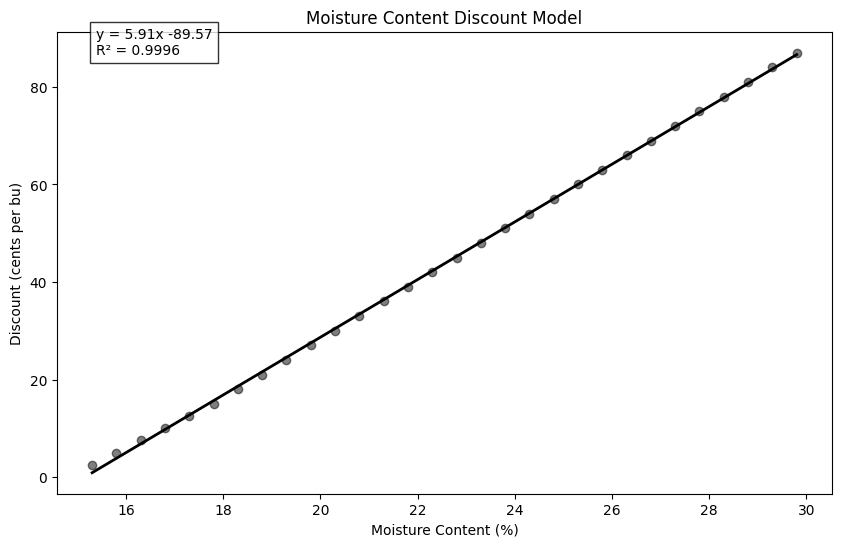

Linear Regression Equation: Discount = 5.91 × MC + -89.57
R-squared: 0.9996


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Data [MOISTURE CONTENT DISCOUNT]
mc = np.array([15.3, 15.8, 16.3, 16.8, 17.3, 17.8, 18.3, 18.8, 19.3, 19.8, 20.3, 20.8, 
               21.3, 21.8, 22.3, 22.8, 23.3, 23.8, 24.3, 24.8, 25.3, 25.8, 26.3, 26.8, 
               27.3, 27.8, 28.3, 28.8, 29.3, 29.8]).reshape(-1, 1)
discount = np.array([2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 
                    36.0, 39.0, 42.0, 45.0, 48.0, 51.0, 54.0, 57.0, 60.0, 63.0, 66.0, 69.0, 
                    72.0, 75.0, 78.0, 81.0, 84.0, 87.0])

# Linear regression
model = LinearRegression()
model.fit(mc, discount)

# Calculate R-squared
r2 = r2_score(discount, model.predict(mc))

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(mc, discount, color='black', alpha=0.5)
plt.plot(mc, model.predict(mc), color='black', linewidth=2)
plt.xlabel('Moisture Content (%)')
plt.ylabel('Discount (cents per bu)')
plt.title('Moisture Content Discount Model')
plt.grid(True, which='major', linestyle='-', alpha=0)

# Add equation to plot
equation = f'y = {model.coef_[0]:.2f}x {model.intercept_: .2f}'
r2_text = f'R² = {r2:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r2_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print detailed statistics
print(f"Linear Regression Equation: Discount = {model.coef_[0]:.2f} × MC + {model.intercept_:.2f}")
print(f"R-squared: {r2:.4f}")

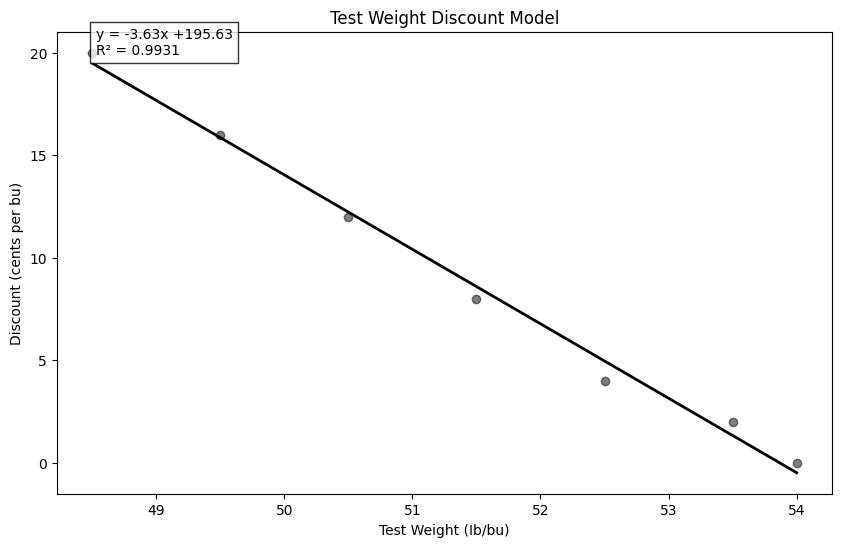

Linear Regression Equation: Discount = -3.63 × MC + 195.63
R-squared: 0.9931


: 

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Data [TW DISCOUNT]
tw = np.array([54.0, 53.5, 52.5, 51.5, 50.5, 49.5, 48.5]).reshape(-1, 1)
discount = np.array([0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0])

# Linear regression
model = LinearRegression()
model.fit(tw, discount)

# Calculate R-squared
r2 = r2_score(discount, model.predict(tw))

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(tw, discount, color='black', alpha=0.5)
plt.plot(tw, model.predict(tw), color='black', linewidth=2)
plt.xlabel('Test Weight (Ib/bu)')
plt.ylabel('Discount (cents per bu)')
plt.title('Test Weight Discount Model')
plt.grid(True, which='major', linestyle='-', alpha=0)

# Add equation to plot
equation = f'y = {model.coef_[0]:.2f}x +{model.intercept_:.2f}'
r2_text = f'R² = {r2:.4f}'
plt.text(0.05, 0.95, equation + '\n' + r2_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print detailed statistics
print(f"Linear Regression Equation: Discount = {model.coef_[0]:.2f} × MC + {model.intercept_:.2f}")
print(f"R-squared: {r2:.4f}")

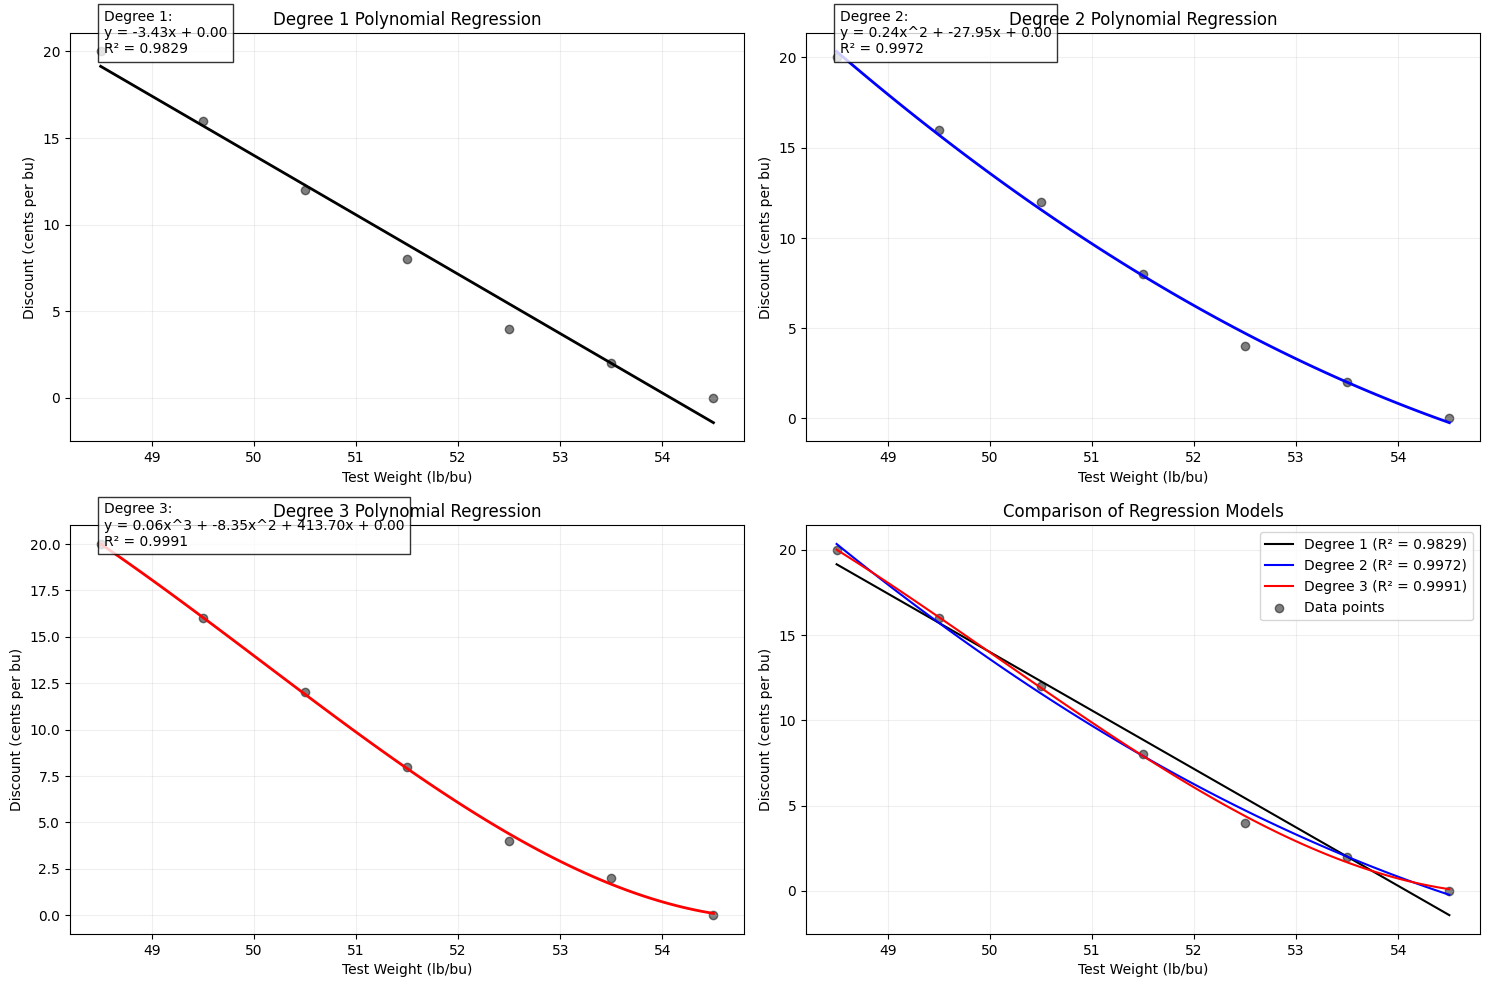


Regression Analysis Results:

Degree 1 Polynomial:
R-squared: 0.9829
Coefficients: [ 0.         -3.42857143]
Intercept: 185.42857142857142

Degree 2 Polynomial:
R-squared: 0.9972
Coefficients: [  0.         -27.95238095   0.23809524]
Intercept: 815.9642857140236

Degree 3 Polynomial:
R-squared: 0.9991
Coefficients: [ 0.00000000e+00  4.13700398e+02 -8.34523811e+00  5.55555557e-02]
Intercept: -6752.389894269001


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data [TW DISCOUNT]
tw = np.array([54.5, 53.5, 52.5, 51.5, 50.5, 49.5, 48.5]).reshape(-1, 1)
discount = np.array([0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0])

# Create figure with multiple subplots
plt.figure(figsize=(15, 10))

# Dictionary to store R-squared values
r2_values = {}

# Colors for different models
colors = ['black', 'blue', 'red', 'green']
degrees = [1, 2, 3]  # Linear, quadratic, cubic

# Create continuous points for smooth curve plotting
X_cont = np.linspace(tw.min(), tw.max(), 100).reshape(-1, 1)

# Plot each regression model
for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(tw)
    X_cont_poly = poly_features.transform(X_cont)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, discount)
    
    # Calculate R-squared
    y_pred = model.predict(X_poly)
    r2 = r2_score(discount, y_pred)
    r2_values[degree] = r2
    
    # Plot
    plt.scatter(tw, discount, color='black', alpha=0.5)
    plt.plot(X_cont, model.predict(X_cont_poly), color=colors[i], linewidth=2)
    
    # Create equation string
    coeffs = model.coef_
    equation = f'y = '
    for j in range(degree, -1, -1):
        if j > 1:
            equation += f'{coeffs[j]:.2f}x^{j} + '
        elif j == 1:
            equation += f'{coeffs[j]:.2f}x + '
        else:
            equation += f'{coeffs[j]:.2f}'
    
    # Add equation and R² to plot
    plt.text(0.05, 0.95, f'Degree {degree}:\n{equation}\nR² = {r2:.4f}', 
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.xlabel('Test Weight (lb/bu)')
    plt.ylabel('Discount (cents per bu)')
    plt.title(f'Degree {degree} Polynomial Regression')
    plt.grid(True, which='major', linestyle='-', alpha=0.2)

# Add comparison plot
plt.subplot(2, 2, 4)
for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(tw)
    X_cont_poly = poly_features.transform(X_cont)
    
    model = LinearRegression()
    model.fit(X_poly, discount)
    
    plt.plot(X_cont, model.predict(X_cont_poly), color=colors[i], 
             label=f'Degree {degree} (R² = {r2_values[degree]:.4f})')

plt.scatter(tw, discount, color='black', alpha=0.5, label='Data points')
plt.xlabel('Test Weight (lb/bu)')
plt.ylabel('Discount (cents per bu)')
plt.title('Comparison of Regression Models')
plt.grid(True, which='major', linestyle='-', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nRegression Analysis Results:")
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(tw)
    
    model = LinearRegression()
    model.fit(X_poly, discount)
    
    r2 = r2_values[degree]
    print(f"\nDegree {degree} Polynomial:")
    print(f"R-squared: {r2:.4f}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

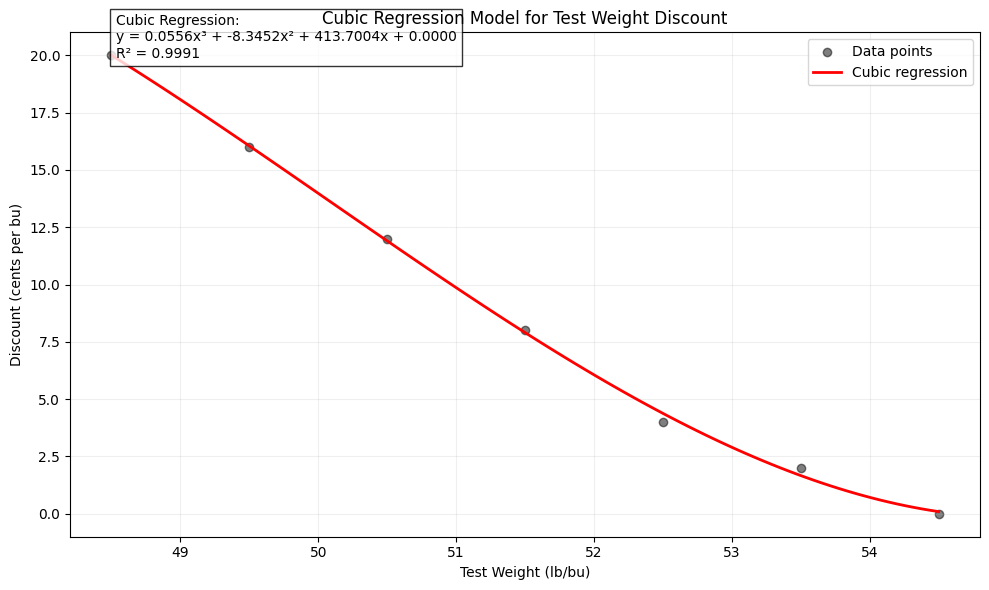


Cubic Regression Analysis Results:
R-squared: 0.9991
Coefficients: [ 0.00000000e+00  4.13700398e+02 -8.34523811e+00  5.55555557e-02]
Intercept: -6752.389894269001


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Data [TW DISCOUNT]
tw = np.array([54.5, 53.5, 52.5, 51.5, 50.5, 49.5, 48.5]).reshape(-1, 1)
discount = np.array([0, 2.0, 4.0, 8.0, 12.0, 16.0, 20.0])

# Create polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(tw)

# Fit model
model = LinearRegression()
model.fit(X_poly, discount)

# Calculate R-squared
y_pred = model.predict(X_poly)
r2 = r2_score(discount, y_pred)

# Create continuous points for smooth curve plotting
X_cont = np.linspace(tw.min(), tw.max(), 100).reshape(-1, 1)
X_cont_poly = poly_features.transform(X_cont)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(tw, discount, color='black', alpha=0.5, label='Data points')
plt.plot(X_cont, model.predict(X_cont_poly), color='red', linewidth=2, label='Cubic regression')

# Create equation string
coeffs = model.coef_
equation = f'y = {coeffs[3]:.4f}x³ + {coeffs[2]:.4f}x² + {coeffs[1]:.4f}x + {coeffs[0]:.4f}'

# Add equation and R² to plot
plt.text(0.05, 0.95, f'Cubic Regression:\n{equation}\nR² = {r2:.4f}', 
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Test Weight (lb/bu)')
plt.ylabel('Discount (cents per bu)')
plt.title('Cubic Regression Model for Test Weight Discount')
plt.grid(True, which='major', linestyle='-', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nCubic Regression Analysis Results:")
print(f"R-squared: {r2:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)